In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore", module="matplotlib")
f_size=32
mpl.rcParams['xtick.labelsize']=f_size
mpl.rcParams['ytick.labelsize']=f_size
mpl.rcParams['axes.labelweight']='light'
mpl.rcParams['axes.labelsize']=f_size
mpl.rcParams['font.size']=f_size
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Helvetica'
mpl.rcParams['font.style']='normal'
mpl.rcParams['font.weight']='light'
mpl.rcParams['figure.dpi']=600
mpl.rcParams['figure.figsize']=(1.0,1.0)
mpl.rcParams['legend.frameon']=False;
mpl.rcParams['figure.autolayout']=True;
mpl.rcParams['xtick.major.size']=10;
mpl.rcParams['xtick.major.width']=1.5
mpl.rcParams['xtick.minor.size']=6;
mpl.rcParams['xtick.minor.width']=1
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.major.width']=1.5
mpl.rcParams['ytick.minor.size']=4;
mpl.rcParams['ytick.minor.width']=1
mpl.rcParams['legend.fontsize']=f_size
#mpl.rcParams['text.fontsize'] =f_size
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Helvetica'
colors=['black','Coral','Red','DarkOrange','Brown','Gold','MediumSeaGreen','Green','LightSeaGreen',
       'SteelBlue','Blue','Navy','DarkViolet','DeepPink']

#import mpld3
#mpld3.enable_notebook()
import pandas as pd
import numpy as np
engine='python'

# $MoSe_2$ Bulk Structure

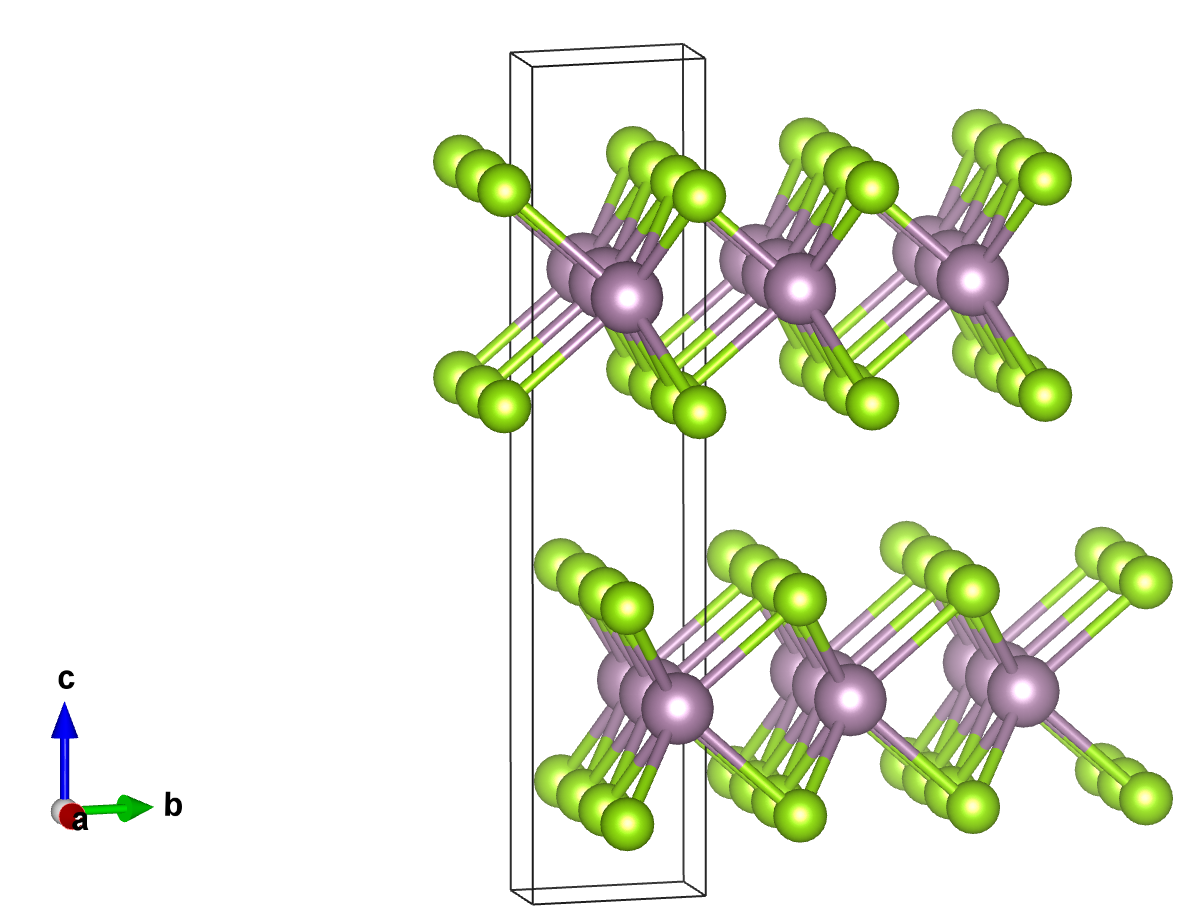

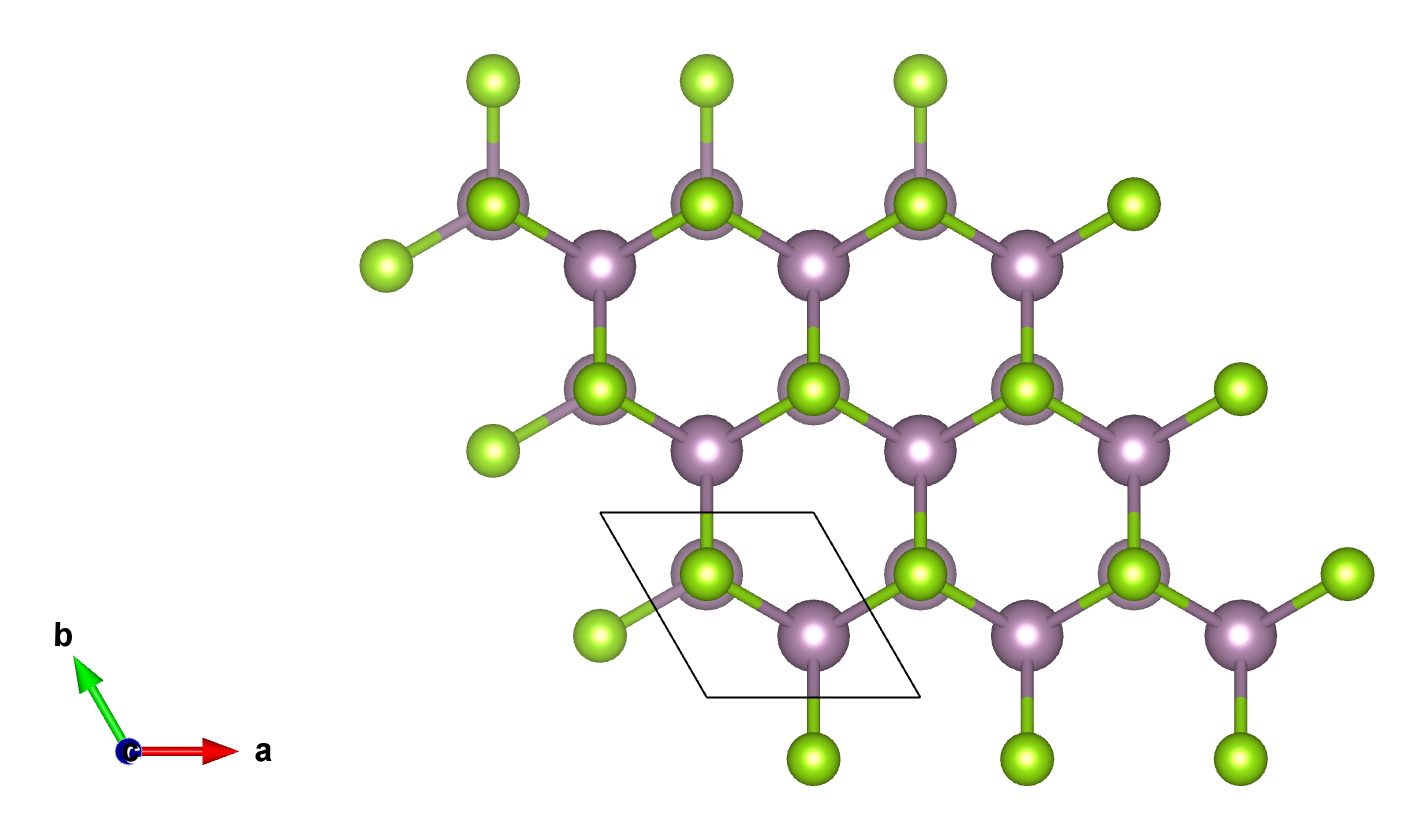

In [2]:
from IPython.display import Image
from IPython.display import display
I1=Image(filename='../../../MoSe2/Bulk_MoSe2_a.png',width=500)
I2=Image(filename='../../../MoSe2/Bulk_MoSe2_c.png',width=500)
display(I1,I2)

Relaxed lattice parameters:
 - $a=3.24774246$ Å
 - $c=12.7356322$ Å

Electronic Configuration:
- Mo: []

## BandGap Convergence

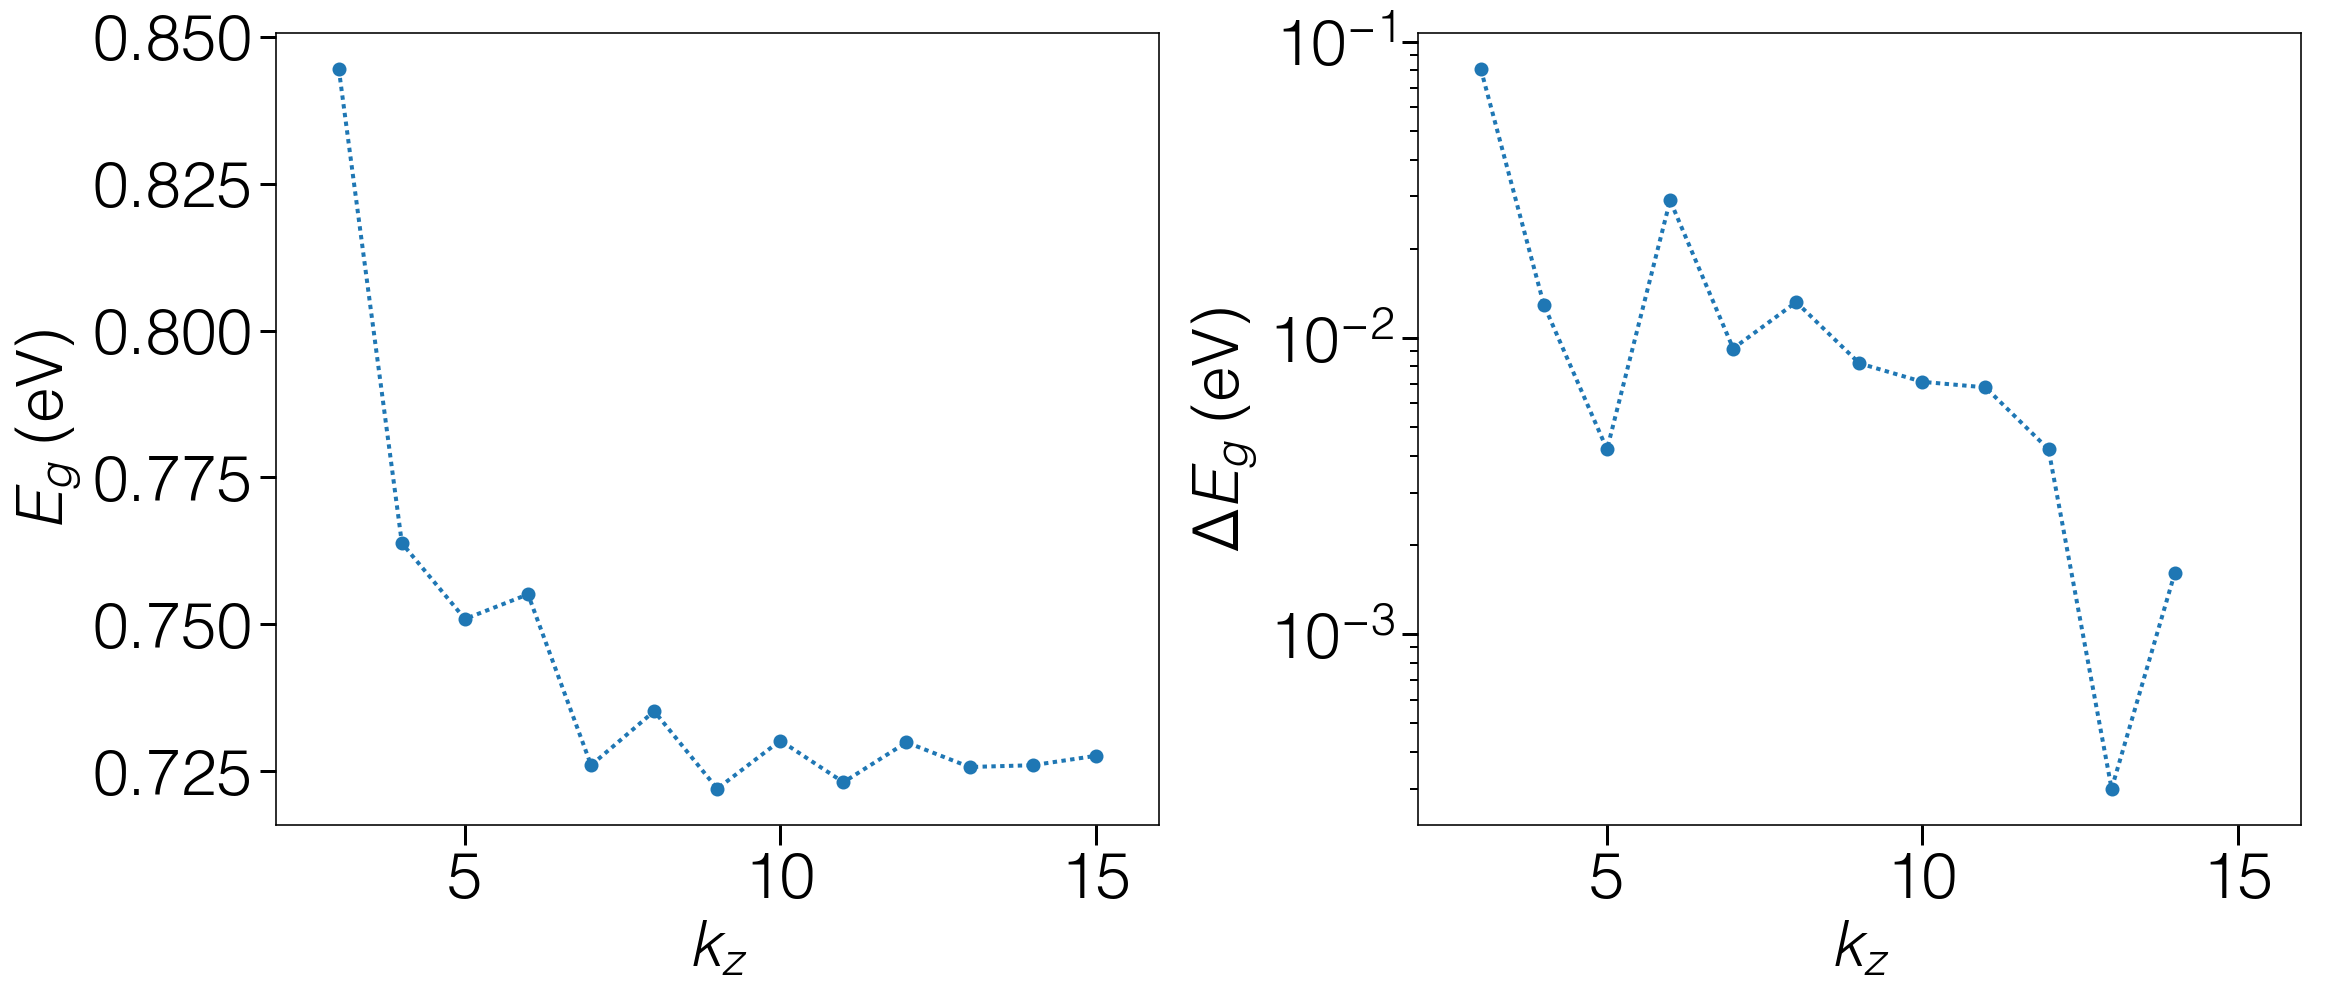

In [17]:
%matplotlib inline
# Convergence Function
def conv(arr):
    arr_conv=abs(arr[1::]-arr[0:-1:])
    arr_conv=np.append(arr_conv,None)
    return arr_conv

# Read data files
path='../../../MoSe2/LDA/Bulk/DOS/'
name='k_LOL_HUL_Eg.txt'
data=pd.read_csv(path+name,delim_whitespace=True,skiprows=[0],names=['kx','ky','kz','LOL','HUL','Eg']);

# Convergence
data['conv_Eg']=conv(data['Eg'].values)

# Bandgap Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data['kz'],data['Eg'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([2,16])
ax1.set_xlabel(r'$k_z$')
ax1.set_ylabel(r'$E_g$ (eV)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data['kz'].values[:-1:],data['conv_Eg'].values[:-1:],linewidth=2,marker='o',linestyle=':')
#ax2.set_ylim([10**-3,10**1])
ax2.set_xlim([2,16])
ax2.set_xlabel(r'$k_z$')
ax2.set_ylabel(r'$\Delta E_g$ (eV)')


## Density of States

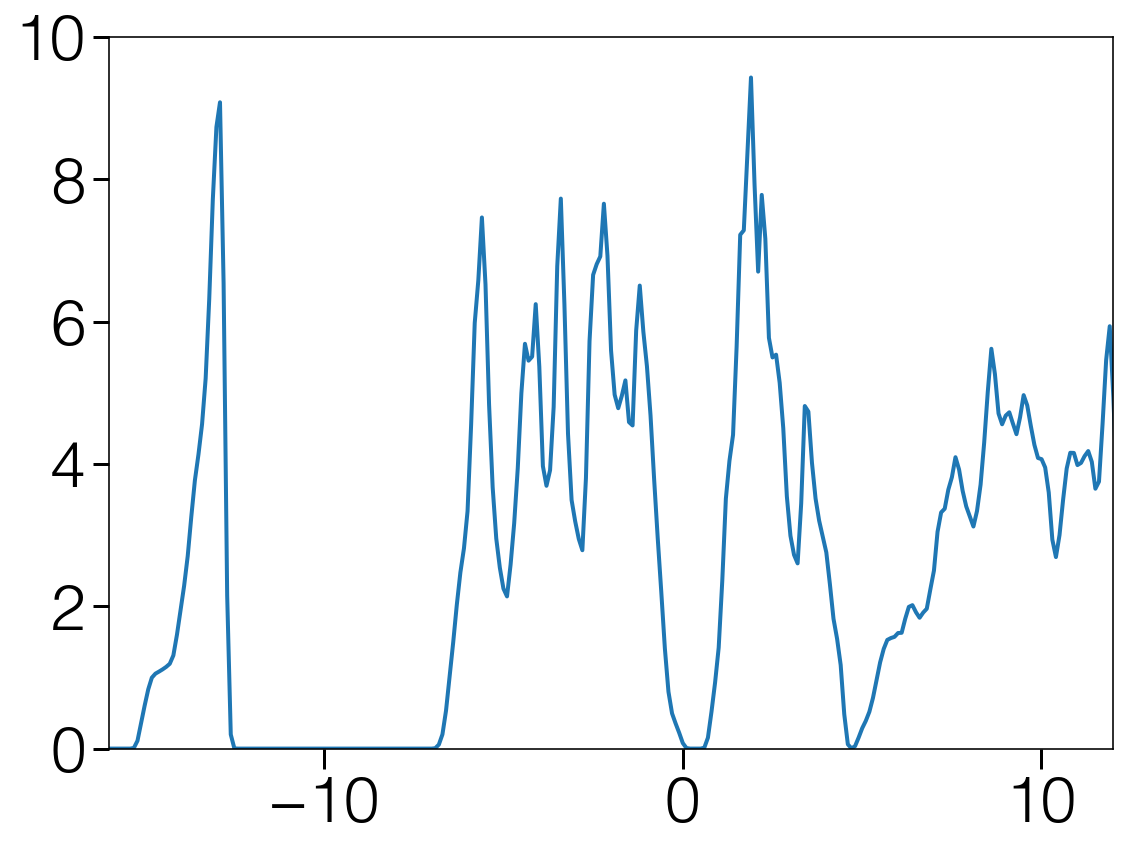

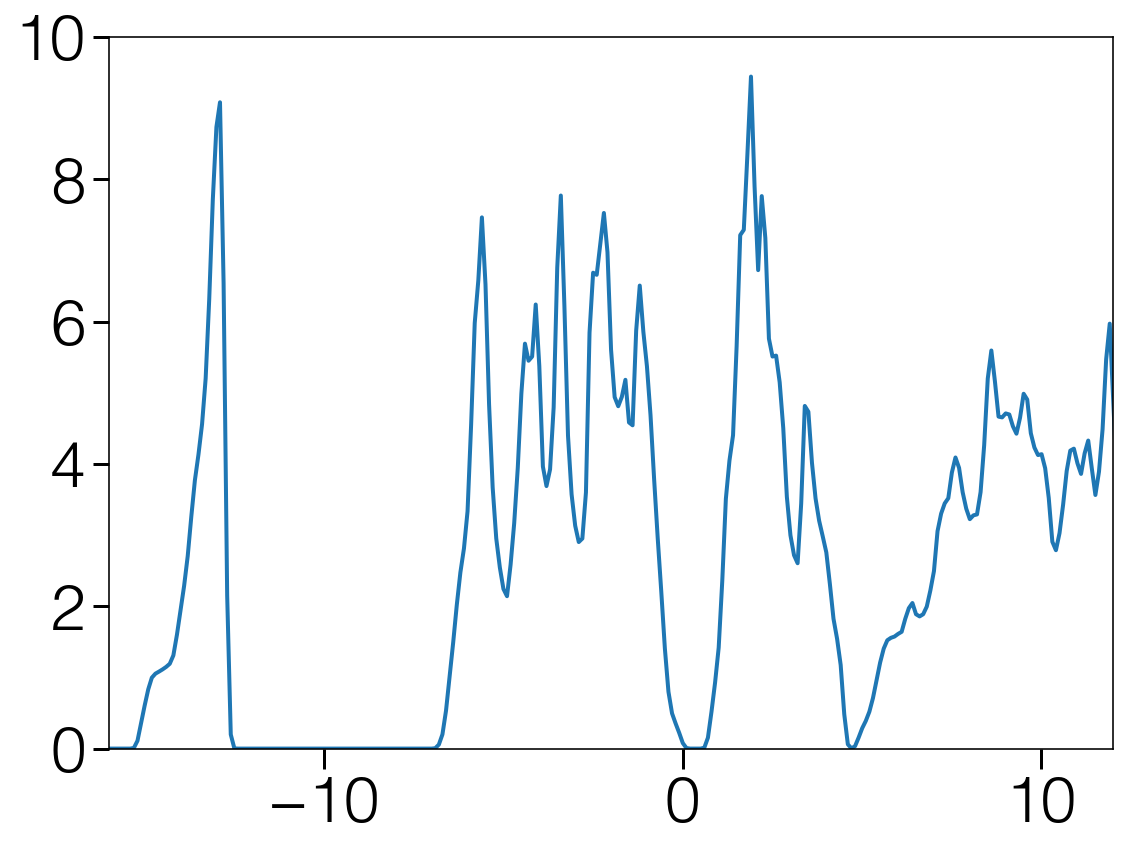

In [27]:
%matplotlib inline
# Read data files
path='../../../MoSe2/LDA/Bulk/DOS/'

# fig1=plt.figure(figsize=(8,6))
# ax1=fig1.add_subplot(111)
name_vec=['mose2_k14.dos','mose2_k15.dos']
for name in name_vec:
    si_DOS=pd.read_csv(path+name,delim_whitespace=True,skiprows=[0],names=['E','DOS','intDOS']);

    # Plot
    
    # ax1.plot(si_pDOS['E']-6.1880,si_pDOS['DOS'],linewidth=2.0,
    #          linestyle='-',label=r'LDA [$\mathregular{a_0^{(LDA)}}$]')
    # # ax1.plot(si_pDOS['E']-6.1880,si_pDOS['pDOS'],linewidth=2.0,
    # #          linestyle='-',label=r'LDA [$\mathregular{a_0^{(LDA)}}$]')
    fig1=plt.figure(figsize=(8,6))
    ax1=fig1.add_subplot(111)
    ax1.plot(si_DOS['E']-10.9963 ,si_DOS['DOS'],linewidth=2.0,
             linestyle='-',label=r'LDA [$\mathregular{a_0^{(LDA)}}$]')
    # ax1.plot(si_DOS['E']-6.1880,si_DOS['pDOS'],linewidth=2.0,
    #          linestyle='-',label=r'LDA [$\mathregular{a_0^{(LDA)}}$]')

    # q_vec=np.array([0.0000,0.8660,1.8660])
    # qlabel_vec=['L',r'$\Gamma$','X']
    # for q,qlabel in zip(q_vec,qlabel_vec):
    #     ax1.axvline(q,color='k',alpha=0.7)
    #ax1.set_xlim([min(si_tDOS['E'])-6.1880,max(si_tDOS['E'])-6.1880])

    ax1.set_xlim([-16,12])
    ax1.set_ylim([0,10])
    # ax1.set_xticks(q_vec)
    # ax1.set_xticklabels(qlabel_vec)
    #si_tDOS